In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt
from datetime import timedelta

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

inspector = inspect(engine)
inspector.get_table_names()
stationcolumns = inspector.get_columns('station')
for c in stationcolumns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [8]:
measurecolumns = inspector.get_columns('measurement')
for c in measurecolumns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
conn = engine.connect()

In [10]:
pd.read_sql("SELECT * FROM measurement", conn)

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0
5,6,USC00519397,2010-01-07,0.06,70.0
6,7,USC00519397,2010-01-08,0.00,64.0
7,8,USC00519397,2010-01-09,0.00,68.0
8,9,USC00519397,2010-01-10,0.00,73.0
9,10,USC00519397,2010-01-11,0.01,64.0


In [11]:
precip12months = pd.read_sql("SELECT prcp,date FROM measurement where date <'2017-08-24' and date>='2016-08-23'", conn)
precip12months.count()

prcp    2021
date    2230
dtype: int64

In [12]:
precip12months = precip12months.dropna(how='any')
precip12months.count()

prcp    2021
date    2021
dtype: int64

In [13]:
# precip12months.head(2026)


precipmax = pd.read_sql("SELECT max(prcp),date FROM measurement where date <'2017-08-24' and date>='2016-08-23'", conn)
precipmax

,max(prcp),date
0,6.7,2016-09-14


In [14]:
# # Save references to each table
# Measurement = Base.classes.measurement
# Station = Base.classes.station

In [15]:
# # Create our session (link) from Python to the DB
# session = Session(engine)

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date
precip12months = precip12months.sort_values((["date"]),ascending=True)
# Use Pandas Plotting with Matplotlib to plot the data
# precip12months = precip12months.set_index("date")

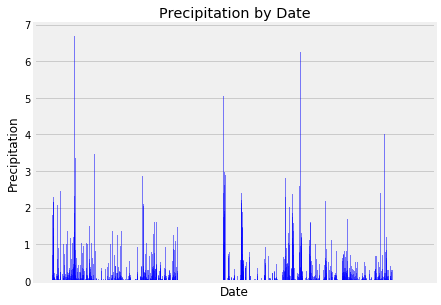

In [17]:
# plt.bar(precip12months["date"], precip12months["prcp"], color='b', alpha=0.5, align="center")
# plt.tight_layout()
# plt.show()

# precip12months.plot.bar(title="Precipitation")
plt.bar(precip12months["date"], precip12months["prcp"], color='b', alpha=0.5, align="center")
# precip12months.axes.get_xaxis().set_visible(False)
plt.xticks([])
plt.tight_layout()
plt.title("Precipitation by Date")
plt.xlabel("Date")
plt.ylabel("Precipitation")
plt.show()

![precipitation](Images/precipitation.png)

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip12months.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [19]:
# Design a query to show how many stations are available in this dataset?
stationcount = pd.read_sql("SELECT count(id) FROM station", conn)
stationcount

,count(id)
0,9


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationcountactive = pd.read_sql("SELECT station, count(id) as count FROM measurement group by station order by count desc", conn)
stationcountactive

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [21]:
stationmostactive = stationcountactive.head(1)
stationmostactive = stationmostactive.drop(['count'], axis=1)
stationmostactive

,station
0,USC00519281


In [22]:
stationmostactivevalue =stationmostactive['station'].tolist()
stationmostactivevalue 

['USC00519281']

In [23]:
finalString = ''.join(stationmostactivevalue)
finalString

'USC00519281'

In [24]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
stationmin = pd.read_sql("SELECT station as 'station id', min(tobs) as 'minimum temp' FROM measurement", conn)
stationmax = pd.read_sql("SELECT station as 'station id', max(tobs) as 'maximum temp' FROM measurement", conn)
stationavg = "SELECT station, avg(tobs) as 'average temp' FROM measurement where station ='{}'".format(finalString)
stationavg2 = pd.read_sql(stationavg, conn)
stationmin

,station id,minimum temp
0,USC00511918,53.0


In [25]:
stationmax

,station id,maximum temp
0,USC00519397,87.0


In [26]:
stationavg2

,station,average temp
0,USC00519281,71.663781


In [27]:
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
prev_year

datetime.date(2016, 8, 23)

In [28]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
stationmaxobs = "SELECT tobs FROM measurement where station ='{}' and date  >= '{}' order by date desc".format(finalString, prev_year)
stationmaxobstest = "SELECT tobs FROM measurement where station ='{}' and date  >= '{}' order by date desc".format(finalString, prev_year)
stationmaxobs2 = pd.read_sql(stationmaxobs, conn)
# stationmaxobs2
stationmaxobstest2= pd.read_sql(stationmaxobstest, conn)
# stationmaxobstest2

In [39]:
stationmaxobstest

"SELECT tobs FROM measurement where station ='USC00519281' and date  >= '2016-08-23' order by date desc"

In [30]:

# stationmaxobstest2 =stationmaxobstest2.head(1)
# stationmaxobstest3 =stationmaxobstest2["date"].tolist()
 
# stationmaxobstest3finalString = ''.join(stationmaxobstest3)
# stationmaxobstest3finalString

# DATETIME = datetime.strptime(stationmaxobstest3finalString, '%Y-%m-%d')
# timedf = pd.DataFrame({"Date":[DATETIME]}) 
# timedf['dateminus1'] = timedf["Date"] - pd.offsets.DateOffset(years=1)
# timedflist =timedf["dateminus1"].tolist()

# type(timedflist)
# timelistnew= timedflist[0]
# print(timelistnew[11:14])

In [31]:
stationmaxobslist =stationmaxobs2['tobs'].tolist()
# stationmaxobslist 

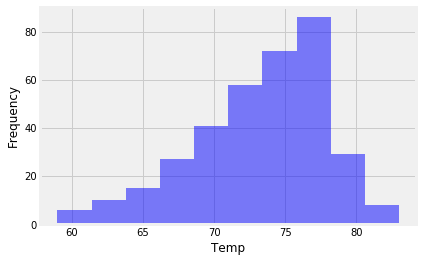

In [32]:
num_bins = 10
n, bins, patches = plt.hist(stationmaxobslist, num_bins, facecolor='blue', label ='tobs',alpha=0.5)
plt.xlabel('Temp')
plt.ylabel('Frequency')
plt.show()

In [33]:
# bins = [0, 60, 65, 70, 75, 80, 85, 90]

# # Create the names for the four bins
# group_names = [60, 65, 70, 75, 80, 85, 90]

# ##### Right =False means that the group names are applied up to but not including the right side bound of the bin 
# stationmaxobs2["tmpbin"] = pd.cut(stationmaxobs2["tobs"], bins, labels=group_names, right=False)
# stationmaxobs2

In [34]:

# stationmaxobsgroup= stationmaxobs2.groupby(['tmpbin']).agg({'tobs': 'count'})

In [35]:
# stationmaxobsgroup =stationmaxobsgroup.reset_index()

In [36]:
# stationmaxobsgroup

In [37]:
# plt.bar( stationmaxobsgroup['tmpbin'], stationmaxobsgroup['tobs'])
# plt.tight_layout()
# plt.show()

![precipitation](Images/station-histogram.png)

In [38]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'session' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
